In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from pydataset import data

# read Iris data from pydatset
df = data('iris')

# convert column names to lowercase, replace '.' in column names with '_'
df.columns = [col.lower().replace('.', '_') for col in df]

df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [2]:
from sklearn.model_selection import train_test_split

def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test


In [3]:
# split into train, validate, test
train, validate, test = train_validate_test_split(df, target='species', seed=123)

# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['species'])
y_train = train.species

X_validate = validate.drop(columns=['species'])
y_validate = validate.species

X_test = test.drop(columns=['species'])
y_test = test.species


In [4]:
# weights = ['uniform', 'density']
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')


In [5]:
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [6]:
y_pred = knn.predict(X_train)


In [7]:
y_pred_proba = knn.predict_proba(X_train)
y_pred_proba[0:4]

array([[0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.2, 0.8],
       [0. , 1. , 0. ]])

In [8]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))


Accuracy of KNN classifier on training set: 0.99


In [9]:
print(confusion_matrix(y_train, y_pred))


[[28  0  0]
 [ 0 27  1]
 [ 0  0 28]]


In [10]:
print(classification_report(y_train, y_pred))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        28
  versicolor       1.00      0.96      0.98        28
   virginica       0.97      1.00      0.98        28

    accuracy                           0.99        84
   macro avg       0.99      0.99      0.99        84
weighted avg       0.99      0.99      0.99        84



In [11]:
# first_nearest_neighbor
import pandas as pd
samples = pd.DataFrame({'a': [5.7, 5.5, 6.3], 
                        'b': [2.6, 3.5, 2.8], 
                        'c': [3.5, 1.3, 5.1], 
                        'd': [1.0, 0.2, 1.5], 
                        'target': ['versicolor', 'setosa', 'virginica']
                       })


samples


,a,b,c,d,target
0,5.7,2.6,3.5,1.0,versicolor
1,5.5,3.5,1.3,0.2,setosa
2,6.3,2.8,5.1,1.5,virginica


In [12]:
new_obs = pd.DataFrame([[6.3, 2.8, 5.1, 1.4], 
                       [6.25, 2.77, 5.09, 1.35], 
                       [5.5, 3.5, 1.29, 0.3]], 
                        columns = ['a', 'b', 'c', 'd'])

new_obs


,a,b,c,d
0,6.30,2.80,5.10,1.40
1,6.25,2.77,5.09,1.35
2,5.50,3.50,1.29,0.30


In [13]:
pred_target = pd.DataFrame(['virginica', 'virginica', 'setosa'], columns=['pred_target'])
pd.concat([new_obs, pred_target], axis=1)


,a,b,c,d,pred_target
0,6.30,2.80,5.10,1.40,virginica
1,6.25,2.77,5.09,1.35,virginica
2,5.50,3.50,1.29,0.30,setosa


In [14]:
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(X_validate, y_validate)))


Accuracy of KNN classifier on test set: 0.97


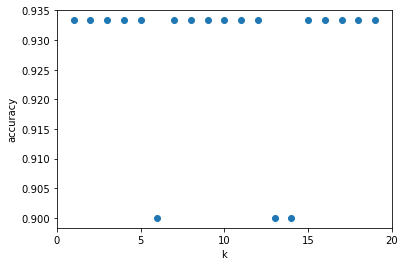

In [15]:
import matplotlib.pyplot as plt
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()


# **Exercises**

**Continue working in your model file with the titanic dataset.**

- 1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

- 2. Evaluate your results using the model score, confusion matrix, and classification report.

- 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

- 4. Run through steps 2-4 setting k to 10

- 5. Run through setps 2-4 setting k to 20

- 6. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

- 7. Which model performs best on our out-of-sample data from validate?

In [30]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import acquire
import prepare
from prepare import prep_titanic_data
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [31]:
df = acquire.get_titanic_data()

In [49]:

train, validate, test = prep_titanic_data(df)


In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 583 to 744
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   passenger_id             498 non-null    int64  
 1   survived                 498 non-null    int64  
 2   pclass                   498 non-null    int64  
 3   sex                      498 non-null    object 
 4   age                      498 non-null    float64
 5   sibsp                    498 non-null    int64  
 6   parch                    498 non-null    int64  
 7   fare                     498 non-null    float64
 8   embark_town              498 non-null    object 
 9   alone                    498 non-null    int64  
 10  sex_male                 498 non-null    uint8  
 11  embark_town_Queenstown   498 non-null    uint8  
 12  embark_town_Southampton  498 non-null    uint8  
dtypes: float64(2), int64(6), object(2), uint8(3)
memory usage: 44.3+ KB


In [53]:
train.head()


,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
583,583,0,1,male,36.000000,0,0,40.1250,Cherbourg,1,1,0,0
165,165,1,3,male,9.000000,0,2,20.5250,Southampton,0,1,0,1
50,50,0,3,male,7.000000,4,1,39.6875,Southampton,0,1,0,1
259,259,1,2,female,50.000000,0,1,26.0000,Southampton,0,0,0,1
306,306,1,1,female,29.678105,0,0,110.8833,Cherbourg,1,0,0,0


In [60]:
# split into train, validate, test
train, validate, test = train_validate_test_split(df, target='survived', seed=123)

# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [55]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 583 to 744
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   passenger_id             498 non-null    int64  
 1   pclass                   498 non-null    int64  
 2   sex                      498 non-null    object 
 3   age                      498 non-null    float64
 4   sibsp                    498 non-null    int64  
 5   parch                    498 non-null    int64  
 6   fare                     498 non-null    float64
 7   embark_town              498 non-null    object 
 8   alone                    498 non-null    int64  
 9   sex_male                 498 non-null    uint8  
 10  embark_town_Queenstown   498 non-null    uint8  
 11  embark_town_Southampton  498 non-null    uint8  
dtypes: float64(2), int64(5), object(2), uint8(3)
memory usage: 40.4+ KB


In [66]:
# drop out non-numerical columns or non-encoded version remaining in this data set
test = train.drop(columns=['passenger_id', 'embark_town', 'passenger_id'])

In [67]:
test.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,alone
583,0,1,male,36.0,0,0,40.1250,C,First,A,1
165,1,3,male,9.0,0,2,20.5250,S,Third,NaN,0
50,0,3,male,7.0,4,1,39.6875,S,Third,NaN,0
259,1,2,female,50.0,0,1,26.0000,S,Second,NaN,0
306,1,1,female,NaN,0,0,110.8833,C,First,NaN,1


In [62]:
# weights = ['uniform', 'density']
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')


In [68]:
knn.fit(X_train, y_train)


ValueError: could not convert string to float: 'male'